# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"
## LGMVIP September-24

<font size="4">Author Reginold K Binoy</font>


BEGINNER LEVEL TASK

**TASK-1- Iris Flowers Classification ML Project :**

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset link : http://archive.ics.uci.edu/ml/machine-learning-databases/iris

<font size="1">Importing Libraries</font>


In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])

In [17]:
df

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df.head(10)


,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
df.shape


(150, 5)

In [20]:
df.columns


Index(['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm',
       'Petal_Width_in_cm', 'Species_Flower'],
      dtype='object')

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species_Flower      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.isnull().sum()


Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species_Flower        0
dtype: int64

In [23]:
df['Species_Flower'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df.describe()


,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


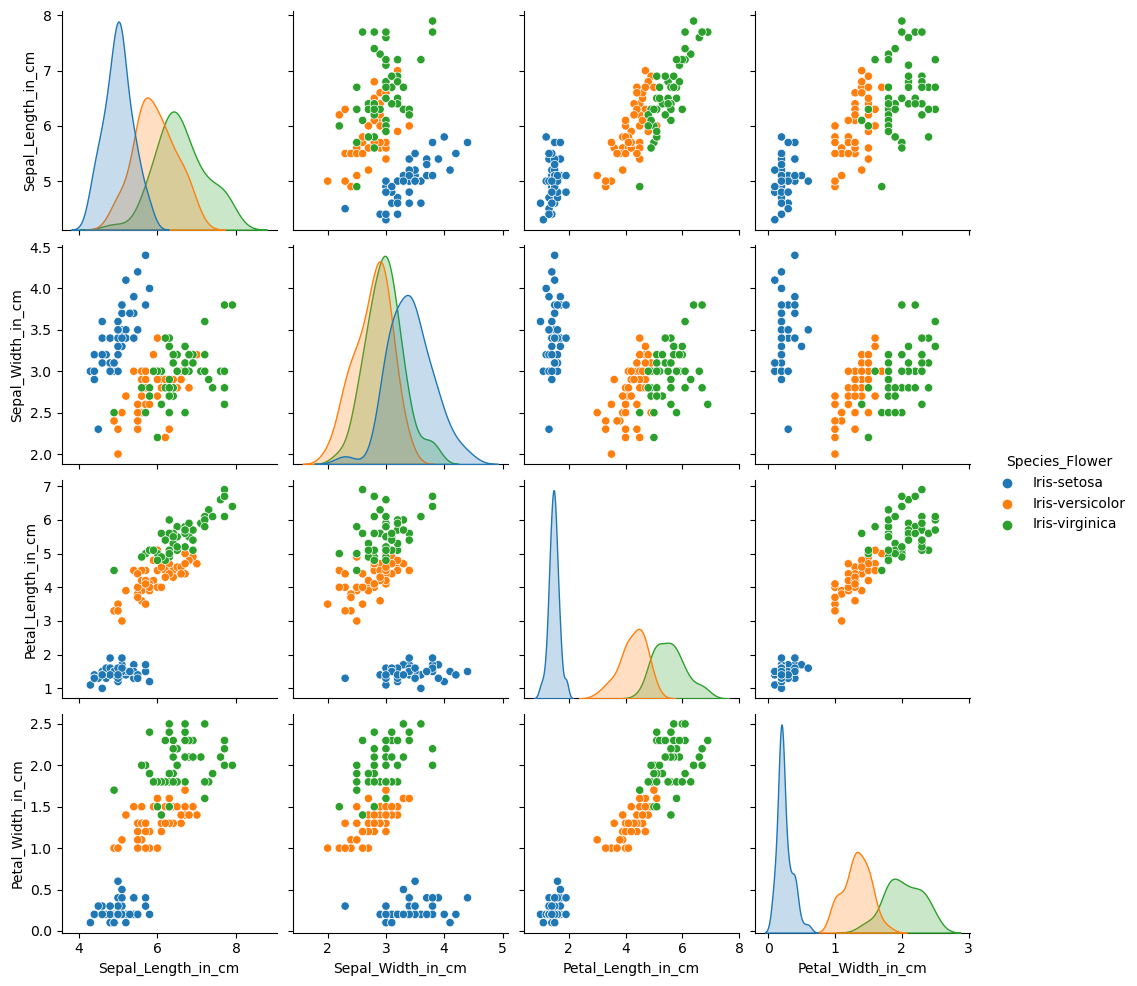

In [25]:
sns.pairplot(df,hue="Species_Flower")


<Axes: xlabel='Sepal_Width_in_cm', ylabel='Petal_Width_in_cm'>

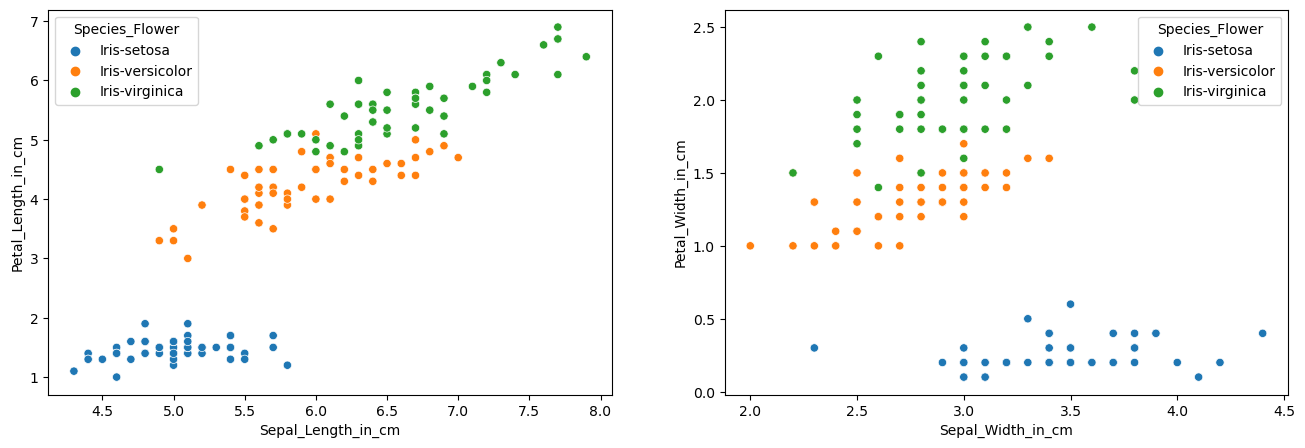

In [26]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=df,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=df,hue='Species_Flower',ax=ax2)

<Axes: ylabel='Petal_Width_in_cm'>

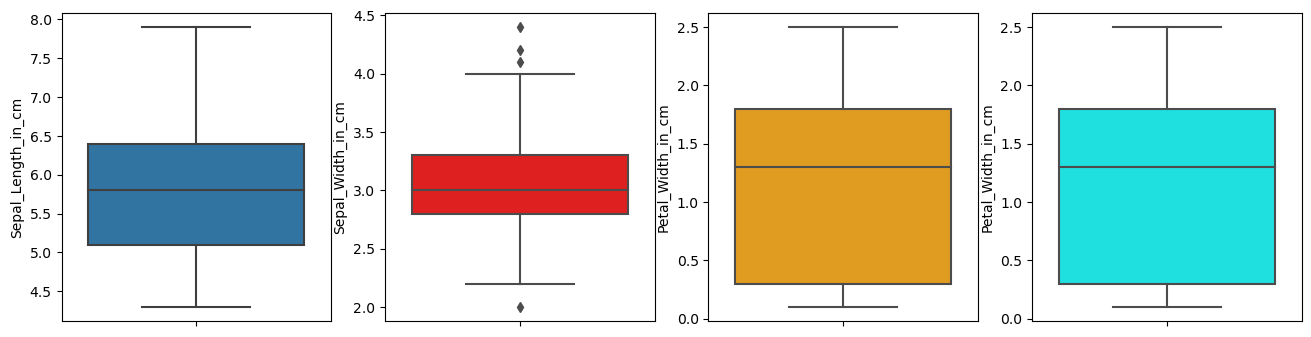

In [27]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='Sepal_Length_in_cm')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='Sepal_Width_in_cm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='cyan')

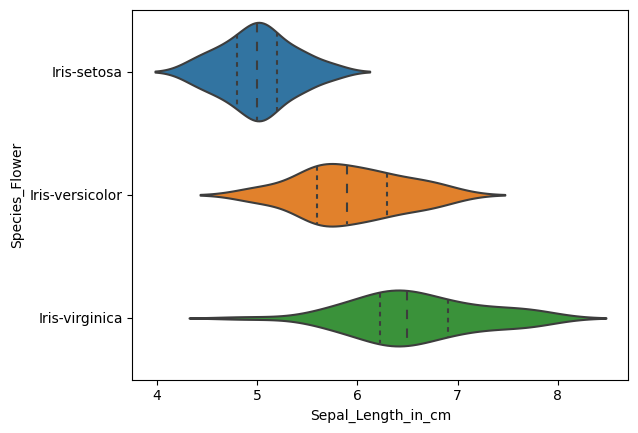

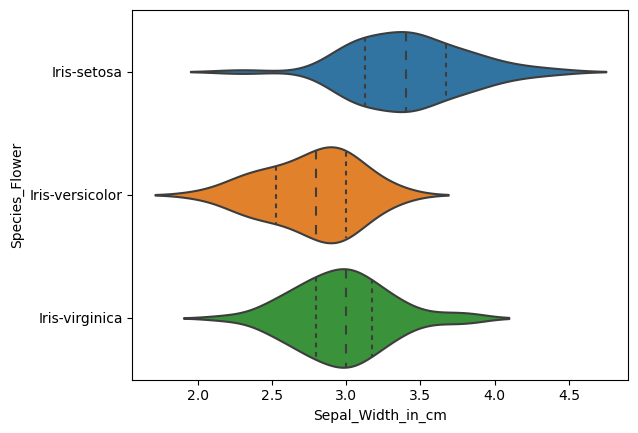

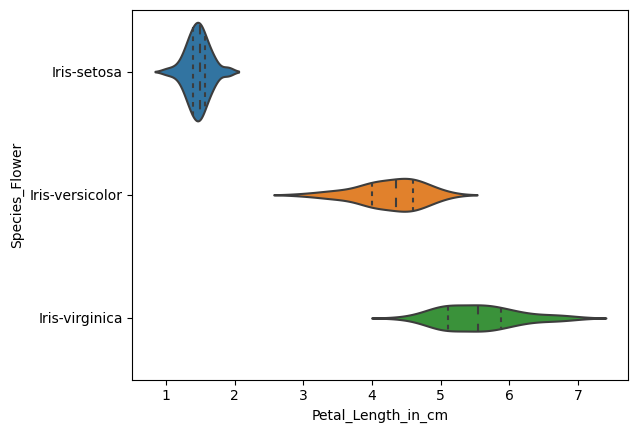

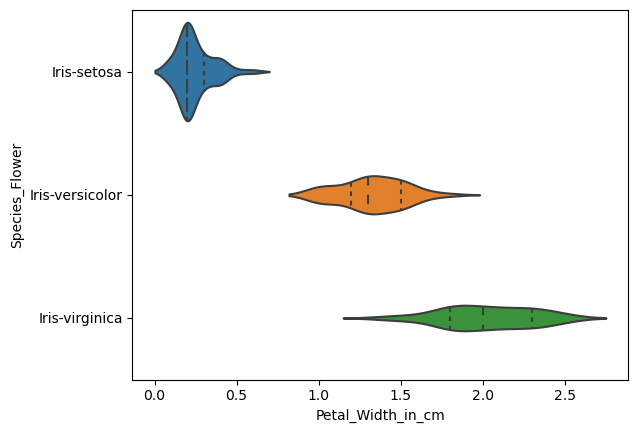

In [28]:
sns.violinplot(y='Species_Flower', x='Sepal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Sepal_Width_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Width_in_cm', data=df, inner='quartile')
plt.show()

# Exclude non-numeric columns and plotting the heatmap

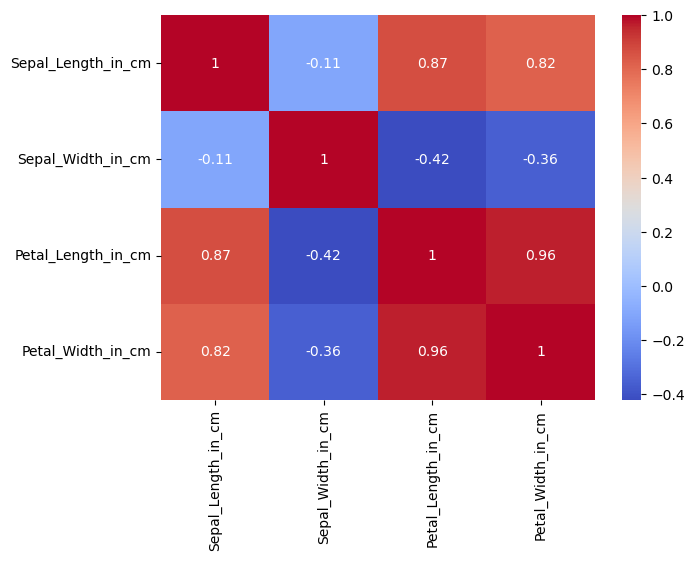

In [30]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['Species_Flower'] = le.fit_transform = (df['Species_Flower'])
df.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

# Initialize a Logistic Regression

In [34]:
lg= LogisticRegression(max_iter=1000)

In [35]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Predict on the test set and calculate accuracy

In [36]:
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [37]:

def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.31      0.47        45
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       0.00      0.00      0.00         0

       accuracy                           0.31        45
      macro avg       0.33      0.10      0.16        45
   weighted avg       1.00      0.31      0.47        45



/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are

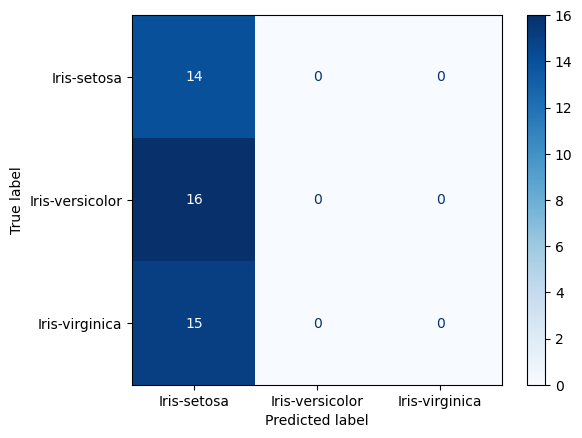

Accuracy: 97.78%


In [42]:
# Import necessary functions and libraries
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# Define the report function
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.show()

# Assuming 'lg' is your trained Logistic Regression model and 'score' is calculated
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score*100, 2)}%')


# Thank You